In [1]:
#improve project submission using thematic analysis
#qualitative analysis on our TOPICS, not the dataset
#paper linked on quercus, step-by-step detailed exploration beyond thematic analysis readings
#each row of matrix are individual topics (step 1)
    #each column of matrix are either terms (filled with probabilities, making a sparse matrix)
    #OR a matrix of top X number of words (filled with probabilities, respective to each topic)
        #here each column could be filled with a different word for each topic, just the positioning of the word
        #we don't tend to use this one (avoid)
#for each topic t, take top 20 words (step 2)
    #t1 is some combination of p1a + p2b + p3c, for each word a, b, c with probabilities
        #vector, this assumes linearity
    #represent each topic as vector made of probabilities of top 20 words
    #for each topic, go and find the top 10 sentences/paragraphs from which the topics originate
    #each document, have distribution of topics, find which documents have highest proportion of topic 1, topic 2...
    #take 5-10 documents for each topic t (step 3)
        #got 5 vectors (topics), each with 20 words, and 5 documents, so 25 things to look at
#(step 4) iteratively read each document from the top 5: 
    #read them a bunch of times and look at top 20 words, now map each word with each document
    #some words are popular in some documents and others not (since descending order of probability in vector)
    #map word to document, will get clusters
    #some of top 20 words come up again and again, note them down and see which words appear together
    #no measurement, this is qualitative
    #write down and words that seem to correlate (physically write this down)
    #100% subjective process, finding relationships between and across topics
    #then take these groups of correlated words and categorize (emotions, seasons, food)
        #more nuanced interpretation of what topics mean
#repeat for each topic (step 5)
    #will have many clusters of categories, these are latent constructs
    #this is what we write about, the clusters and their labels
    #take one of the four algorithmic solutions (CorEx, BTM, LDA or NNMF)

In [2]:
import pandas as pd

df = pd.read_csv("TSData.csv")
df

Unnamed: 0                         SongTitle  \
0             0                  ...Ready for It?   
1             1                                22   
2             2            A Perfectly Good Heart   
3             3             A Place In This World   
4             4                         Afterglow   
..          ...                               ...   
158         158         ​r​ight where you left me   
159         159                        ​the lakes   
160         160  ​the last great american dynasty   
161         161                      ​tolerate it   
162         162             ​’tis the damn season   

                                           UniqueWords  
0    ['', '&', 'act', 'alcohol', 'alone', 'baby', '...  
1    ['', '&', '22', 'alcohol', 'alright', 'anyway'...  
2    ['anymore', 'apart', 'away', 'back', 'believe'...  
3    ['alone', 'ask', 'blue', 'cause', 'coming', 'c...  
4    ['afterglow', 'attack', 'away', 'back', 'behin...  
..                                                 ...  
158  ['', '&', 'alcohol', 'bear', 'born', 'break', ...  
159  ['and\u205fmy\u205fbeloved\u205fneither', 'aro...  
160  ['afternoon', 'american', 'bad', 'ballet', 'be...  
161  ['always', 'assume', 'barbed', 'battle', 'begg...  
162  ['ache', 'always', 'around', 'ask', 'asked', '...  

[163 rows x 3 columns]

In [3]:
empty_df = pd.DataFrame(columns=['SongTitle','Lyrics'])

for i, r in df.iterrows():
    list_for_row = []
    string_words = r[2][1:-1]
    string_words = string_words.replace("'", '')
    string_words = string_words.replace(",", '')
    string_words = string_words.replace("&", '')
    string_words = string_words.replace("  ", '')
    string_words = string_words.replace("\\", '')
    a = string_words.split(" ")
    for word in a:
        if 'u2005' in word:
            word = word.replace('u2005',' ')
            list_for_row.append(word)
        elif 'u205f' in word:
            word = word.replace('u205f',' ')
            list_for_row.append(word)
        elif 'xa0' in word:
            word = word.replace('xa0',' ')
            list_for_row.append(word)
        elif 'u200b' in word:
            word = word.replace('u200b',' ')
            list_for_row.append(word)
        else:
            list_for_row.append(word)
    empty_df.loc[len(empty_df)] = (r[1], list_for_row)

In [4]:
corpus_words = []
for i, r in empty_df.iterrows():
    for word in r[-1]:
        print(word)
        corpus_words.append(word)
corpus_words = set(corpus_words)
corpus_words #total dictionary of words

act
alcohol
alone
baby
begin
better
boys
breeze
burton
comparison
dont
dreams
eh
every
exes
failure
first
forever
forget
games
ghost
girls
go
gon
gonna
hard
haunted
hearts
heist
hes
hmm
holdin
i-island
im
island
ive
jailer
joeboy
join
keep
killer
knew
know
known
left
let
lights
like
love
loved
low
lyrics
man
many
meaning
middle
move
names
never
night
nothing
official
oh
one
phantom
ransom
ready
robber
running
saw
sayin
see
sip
sorry
stealing
take
tame
taylor
thief
things
though
time
touch
try
tryin
vendetta-ta
verified
well
wondered
youll
younger
22
alcohol
alright
anyway
bad
best
bet
breakfast
confused
cool
crowded
dancing
deadlines
ditch
dont
dreaming
dress
end
everything
ew
exes
fall
feeling
feels
forget
free
fun
gotta
happy
heartbreaks
hey!
hipsters
ill
im
instead
joeboy
keep
kids
know
like
lonely
look
love
lyrics
magical
make
many
meaning
midnight
miserable
news
next
night
nights
official
oh
oh-oh
one
ooh
perfect
place
scene
seems
sip
sleeping
strangers
swift
taylor
time
tonights


{'guarded',
 'highly',
 'talk',
 'walking',
 'disapproves',
 'searching',
 'legend',
 'breakfast',
 'start',
 'wear',
 'damn',
 'blushing',
 'pacin',
 'organ',
 'loud',
 'battle',
 'witness',
 'wasnt',
 'i-i-i',
 'gather',
 'whyd',
 'account',
 'swerve',
 'do it',
 'naïve',
 'crying',
 'mosaic',
 'family',
 'laugh',
 'bedroom',
 'surely',
 'blew',
 'decade',
 'slates',
 'ra-di-di-di-di-di-di-di-di-di-da-da',
 'alls',
 'comet',
 'around',
 'earned',
 'slipping',
 'poisoned',
 'roads',
 'mmh',
 'yeah-yeah',
 'dead-end',
 'radio',
 'complained',
 'socal',
 'innocent',
 'springsteen',
 'weve',
 'instrumental',
 'fathers',
 'downtown',
 'sneakers',
 'oh-ho',
 'imagined',
 'glasses',
 'spotlight',
 'ended',
 'storm',
 'firin',
 'angel',
 'called',
 'ooh you',
 'globe',
 '4th',
 'chasing',
 'responsibility',
 'oh-oh',
 'fury',
 'hood',
 'pastry',
 'thankin',
 'send',
 'didn’t',
 'vision',
 'stain',
 'cop-out',
 'lovely',
 'bettеr',
 'darkness',
 'faster',
 'window',
 'impressed',
 'bump',
 's

In [5]:
empty_list_to_add = []
for i, r in empty_df.iterrows():
    empty_list_to_add.append(str(r[1][1:-1]))

In [6]:
empty_df['String'] = empty_list_to_add
empty_df

SongTitle  \
0                    ...Ready for It?   
1                                  22   
2              A Perfectly Good Heart   
3               A Place In This World   
4                           Afterglow   
..                                ...   
158         ​r​ight where you left me   
159                        ​the lakes   
160  ​the last great american dynasty   
161                      ​tolerate it   
162             ​’tis the damn season   

                                                Lyrics  \
0    [act, alcohol, alone, baby, begin, better, boy...   
1    [22, alcohol, alright, anyway, bad, best, bet,...   
2    [anymore, apart, away, back, believe, break, c...   
3    [alone, ask, blue, cause, coming, could, dont,...   
4    [afterglow, attack, away, back, behind, blame,...   
..                                                 ...   
158  [alcohol, bear, born, break, breakups, buried,...   
159  [and my beloved neither, around, auroras, bare...   
160  [afternoon, american, bad, ballet, beach, bets...   
161  [always, assume, barbed, battle, begging, beli...   
162  [ache, always, around, ask, asked, babe, back,...   

                                                String  
0    ['alcohol', 'alone', 'baby', 'begin', 'better'...  
1    ['alcohol', 'alright', 'anyway', 'bad', 'best'...  
2    ['apart', 'away', 'back', 'believe', 'break', ...  
3    ['ask', 'blue', 'cause', 'coming', 'could', 'd...  
4    ['attack', 'away', 'back', 'behind', 'blame', ...  
..                                                 ...  
158  ['bear', 'born', 'break', 'breakups', 'buried'...  
159  ['around', 'auroras', 'bare', 'bathe', 'belong...  
160  ['american', 'bad', 'ballet', 'beach', 'bets',...  
161  ['assume', 'barbed', 'battle', 'begging', 'bel...  
162  ['always', 'around', 'ask', 'asked', 'babe', '...  

[163 rows x 3 columns]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(empty_df['String']).toarray()

# tf_feature_names tells us what word each column in the matrix represents
tf_feature_names = vectorizer.get_feature_names()

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Result from NNMF for 2-30 Topics:

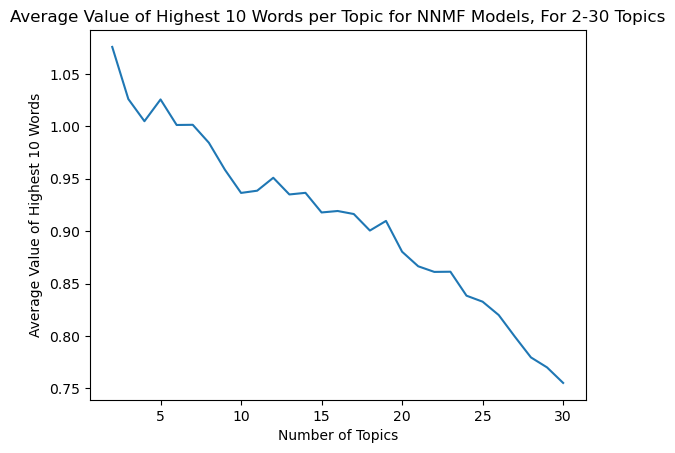

In [8]:
#from the above analysis, I am going to use t=5 topics, since this was a local peak (and highest average value for all t
    #values > 2)

In [9]:
from sklearn.decomposition import NMF

model = NMF(n_components=5, random_state=0, alpha=.1, l1_ratio=.5)
model.fit(tf)
nmf_features = model.transform(tf)

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


In [10]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [11]:
display_topics(model, tf_feature_names, 21) #21 top words for each of the 5 topics

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0         'say',             1.5            ',             5.3         'go',   
1        'dont',             1.3         'im',             0.4       'love',   
2        'know',             1.3        'one',             0.4      'never',   
3          'im',             1.2       'know',             0.4        'see',   
4          'oh',             1.2      'heart',             0.3        'let',   
5         'got',             1.1       'like',             0.3       'like',   
6         'way',             1.1       'home',             0.3       'mind',   
7         'ive',             1.1       'want',             0.2      'thats',   
8        'come',             0.9      'didnt',             0.2         'oh',   
9        'take',             0.7      'think',             0.2      'could',   
10       'feel',             0.7     'around',             0.2      'think',   
11        'ill',             0.7      'would',             0.2       'away',   
12     'little',             0.6       'good',             0.2       'good',   
13       'well',             0.6      'cause',             0.2      'leave',   
14       'like',             0.6        'get',             0.2       'ever',   
15       'eyes',             0.6        'new',             0.2       'know',   
16      'cause',             0.6       'time',             0.2       'dont',   
17      'wanna',             0.5        'see',             0.2         'im',   
18    'friends',             0.5       'name',             0.2      'wanna',   
19      'every',             0.5       'dont',             0.2        'ill',   
20       'back',             0.5       'come',             0.2      'cause',   

   Topic 2 weights  Topic 3 words Topic 3 weights Topic 4 words  \
0              2.0        'time',             1.9       'cant',   
1              1.5        'back',             1.4        'one',   
2              1.4       'right',             1.2        'get',   
3              1.2        'said',             1.2      'could',   
4              1.1        'like',             1.1      'think',   
5              0.8          'im',             0.9      'cause',   
6              0.7       'cause',             0.8     'things',   
7              0.7        'ever',             0.8        'see',   
8              0.7        'last',             0.8       'look',   
9              0.7       'never',             0.7      'night',   
10             0.7     'nothing',             0.7        'got',   
11             0.7       'night',             0.6       'like',   
12             0.6      'around',             0.6       'even',   
13             0.6       'every',             0.5       'tell',   
14             0.5        'long',             0.5       'know',   
15             0.5       'didnt',             0.5       'dont',   
16             0.5        'baby',             0.5         'oh',   
17             0.5  'everything',             0.5       'keep',   
18             0.5        'know',             0.5      'thing',   
19             0.5        'face',             0.5       'take',   
20             0.4          'id',             0.5       'want',   

   Topic 4 weights  
0              1.6  
1              1.4  
2              1.1  
3              0.9  
4              0.9  
5              0.9  
6              0.9  
7              0.9  
8              0.9  
9              0.9  
10             0.8  
11             0.8  
12             0.8  
13             0.8  
14             0.7  
15             0.7  
16             0.6  
17             0.6  
18             0.6  
19             0.6  
20             0.5

In [12]:
#these are the vectors of 20 words and coefficients (weights) for 5 topics within the Taylor Swift lyricography examined

In [13]:
components_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names()) 
components_df

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


',  'around',   'away',   'baby',   'back',   'best',  'better',  \
0  0.000000   0.000000  0.458112  0.400013  0.475959  0.268841   0.006690   
1  5.280371   0.214672  0.086600  0.110044  0.118155  0.089200   0.000000   
2  0.000000   0.402148  0.651477  0.051963  0.131649  0.052608   0.132268   
3  0.000000   0.565699  0.000000  0.492139  1.437680  0.219385   0.350576   
4  0.000000   0.000000  0.000000  0.000000  0.000000  0.159856   0.255484   

    'cant',  'cause',   'come',  ...  'things',  'think',   'time',   'town',  \
0  0.000000  0.565695  0.902959  ...   0.105630  0.000000  0.137764  0.097188   
1  0.158784  0.192219  0.167995  ...   0.002400  0.221881  0.182674  0.041401   
2  0.000000  0.439962  0.217130  ...   0.042552  0.679575  0.000000  0.134037   
3  0.000000  0.778692  0.192899  ...   0.021972  0.017648  1.947154  0.172178   
4  1.599981  0.885941  0.000000  ...   0.873634  0.922795  0.269680  0.293120   

      'us',  'wanna',   'want',    'way',   'well',  'would',  
0  0.093764  0.547732  0.441580  1.065986  0.614851  0.207314  
1  0.083645  0.146715  0.247594  0.019236  0.016479  0.207181  
2  0.112582  0.477343  0.288826  0.026940  0.183342  0.000000  
3  0.303702  0.000000  0.000000  0.000000  0.000000  0.332112  
4  0.187178  0.051312  0.522735  0.203292  0.258496  0.070098  

[5 rows x 87 columns]

In [14]:
#this is a topic-term matrix showing probabilities

# Now code to find most common songs for each topic:

In [15]:
data = pd.read_csv("TSData.csv")
data = data[['SongTitle', 'UniqueWords']]
data

SongTitle  \
0                    ...Ready for It?   
1                                  22   
2              A Perfectly Good Heart   
3               A Place In This World   
4                           Afterglow   
..                                ...   
158         ​r​ight where you left me   
159                        ​the lakes   
160  ​the last great american dynasty   
161                      ​tolerate it   
162             ​’tis the damn season   

                                           UniqueWords  
0    ['', '&', 'act', 'alcohol', 'alone', 'baby', '...  
1    ['', '&', '22', 'alcohol', 'alright', 'anyway'...  
2    ['anymore', 'apart', 'away', 'back', 'believe'...  
3    ['alone', 'ask', 'blue', 'cause', 'coming', 'c...  
4    ['afterglow', 'attack', 'away', 'back', 'behin...  
..                                                 ...  
158  ['', '&', 'alcohol', 'bear', 'born', 'break', ...  
159  ['and\u205fmy\u205fbeloved\u205fneither', 'aro...  
160  ['afternoon', 'american', 'bad', 'ballet', 'be...  
161  ['always', 'assume', 'barbed', 'battle', 'begg...  
162  ['ache', 'always', 'around', 'ask', 'asked', '...  

[163 rows x 2 columns]

In [16]:
data = pd.read_csv("TSData.csv")
data = data[['SongTitle', 'UniqueWords']]

for i, r in data.iterrows():
    r[-1] = r[-1].replace("'", '')
    r[-1] = r[-1].split(',')
    if "[" in r[-1][0]:
        r[-1][0]=r[-1][0].replace('[', '')
        r[-1][-1]=r[-1][-1].replace(']', '')
    print(r[-1])

['', ' &', ' act', ' alcohol', ' alone', ' baby', ' begin', ' better', ' boys', ' breeze', ' burton', ' comparison', ' dont', ' dreams', ' eh', ' every', ' exes', ' failure', ' first', ' forever', ' forget', ' games', ' ghost', ' girls', ' go', ' gon', ' gonna', ' hard', ' haunted', ' hearts', ' heist', ' hes', ' hmm', ' holdin', ' i-island', ' im', ' island', ' ive', ' jailer', ' joeboy', ' join', ' keep', ' killer', ' knew', ' know', ' known', ' left', ' let', ' lights', ' like', ' love', ' loved', ' low', ' lyrics', ' man', ' many', ' meaning', ' middle', ' move', ' names', ' never', ' night', ' nothing', ' official', ' oh', ' one', ' phantom', ' ransom', ' ready', ' robber', ' running', ' saw', ' sayin', ' see', ' sip', ' sorry', ' stealing', ' take', ' tame', ' taylor', ' thief', ' things', ' though', ' time', ' touch', ' try', ' tryin', ' vendetta-ta', ' verified', ' well', ' wondered', ' youll', ' younger']
['', ' &', ' 22', ' alcohol', ' alright', ' anyway', ' bad', ' best', ' 

In [17]:
t1 = [0]*163
t2 = [0]*163
t3 = [0]*163
t4 = [0]*163

t1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [18]:
list1 = ['around','cause','come',"didn't",'didnt','dont',"don't",'get','good','heart','home','im',"i'm",'know',
        'like','name','new','one','think','time','see','want','would']
list2 = ['away','cause','could','dont',"don't",'ever','go','good','ill',"i'll",'im',"i'm",'know','leave','let',
        'like','love','mind','never','oh','thats',"that's",'think','see','wanna']
list3 = ['around','baby','back','cause','didnt',"didn't",'ever','every','everything','force','id',"i'd",
        'im',"i'm",'know','last','like','long','never','night','nothing','right','said','time']
list4 = ['cant',"can't",'could','dont',"don't",'even','get','got','keep','know','like','look','oh','one','night',
        'see','take','tell','thing','things','think','want']

In [19]:
for i, r in data.iterrows():
    
    lyrics = list(r[-1])
    
    for word in lyrics:
        word = word.replace(" ", '')
        
        if word in list1:
            t1[i]+=1
            
        if word in list2:
            t2[i]+=1
            
        if word in list3:
            t3[i]+=1
            
        if word in list4:
            t4[i]+=1
            
t1  

[7,
 7,
 6,
 8,
 7,
 9,
 5,
 8,
 8,
 11,
 12,
 15,
 9,
 9,
 10,
 7,
 5,
 5,
 9,
 7,
 8,
 7,
 7,
 8,
 11,
 12,
 9,
 6,
 8,
 11,
 10,
 10,
 10,
 7,
 6,
 9,
 8,
 8,
 11,
 7,
 8,
 7,
 11,
 10,
 7,
 4,
 10,
 6,
 7,
 6,
 12,
 11,
 10,
 7,
 6,
 3,
 5,
 8,
 6,
 7,
 8,
 8,
 9,
 8,
 3,
 10,
 7,
 8,
 6,
 12,
 11,
 10,
 9,
 5,
 9,
 7,
 3,
 8,
 8,
 6,
 6,
 6,
 10,
 6,
 9,
 7,
 9,
 9,
 6,
 7,
 7,
 6,
 8,
 7,
 7,
 6,
 12,
 11,
 10,
 7,
 7,
 6,
 7,
 8,
 7,
 7,
 7,
 5,
 9,
 6,
 6,
 4,
 7,
 6,
 4,
 8,
 7,
 6,
 9,
 6,
 4,
 9,
 6,
 9,
 9,
 5,
 9,
 7,
 10,
 6,
 10,
 5,
 5,
 8,
 11,
 5,
 11,
 9,
 7,
 12,
 8,
 8,
 5,
 2,
 5,
 9,
 5,
 11,
 7,
 8,
 5,
 7,
 7,
 13,
 7,
 9,
 8,
 9,
 10,
 8,
 5,
 7,
 8]

In [20]:
counting_words = data.copy()
counting_words['Topic1'] = t1
counting_words['Topic2'] = t2
counting_words['Topic3'] = t3
counting_words['Topic4'] = t4
counting_words

SongTitle  \
0                    ...Ready for It?   
1                                  22   
2              A Perfectly Good Heart   
3               A Place In This World   
4                           Afterglow   
..                                ...   
158         ​r​ight where you left me   
159                        ​the lakes   
160  ​the last great american dynasty   
161                      ​tolerate it   
162             ​’tis the damn season   

                                           UniqueWords  Topic1  Topic2  \
0    [,  &,  act,  alcohol,  alone,  baby,  begin, ...       7      10   
1    [,  &,  22,  alcohol,  alright,  anyway,  bad,...       7       7   
2    [anymore,  apart,  away,  back,  believe,  bre...       6       5   
3    [alone,  ask,  blue,  cause,  coming,  could, ...       8       9   
4    [afterglow,  attack,  away,  back,  behind,  b...       7      11   
..                                                 ...     ...     ...   
158  [,  &,  alcohol,  bear,  born,  break,  breaku...      10      10   
159  [and\u205fmy\u205fbeloved\u205fneither,  aroun...       8       5   
160  [afternoon,  american,  bad,  ballet,  beach, ...       5       3   
161  [always,  assume,  barbed,  battle,  begging, ...       7       8   
162  [ache,  always,  around,  ask,  asked,  babe, ...       8      10   

     Topic3  Topic4  
0         9      10  
1         6       9  
2         1       5  
3         3      10  
4         3       9  
..      ...     ...  
158       9      10  
159       5       7  
160       7       0  
161       5       7  
162       8       6  

[163 rows x 6 columns]

In [21]:
counting_words.to_csv('WithCounts.csv')

In [22]:
#ranking songs by frequency of words in each topic

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
#topic 1:
topic1 = counting_words.sort_values(by=['Topic1'], ascending=False)
topic2 = counting_words.sort_values(by=['Topic2'], ascending=False)
topic3 = counting_words.sort_values(by=['Topic3'], ascending=False)
topic4 = counting_words.sort_values(by=['Topic4'], ascending=False)

In [25]:
topic1

SongTitle  \
11                                         Blank Space   
153                                         ​mad woman   
139                                             ​betty   
25                            Death by a Thousand Cuts   
69              Miss Americana & The Heartbreak Prince   
10                                 Better Than Revenge   
50                                    I Think He Knows   
96                              Teardrops On My Guitar   
29                                               Dress   
24                                           Dear John   
38                                         Getaway Car   
147                                         ​happiness   
70   Mr. Perfectly Fine (Taylor’s Version) [From th...   
42                      Hey Stephen (Taylor’s Version)   
97                Teardrops on My Guitar (Pop Version)   
9                                          Begin Again   
51                                    I Wish You Would   
136                                              the 1   
134                                  my tears ricochet   
46                                 I Did Something Bad   
43                                         Holy Ground   
52                                 If This Was a Movie   
130                                           cardigan   
71                                       Never Grow Up   
128                You’re Not Sorry (Taylor’s Version)   
65                                                 ME!   
32                              Everything Has Changed   
30                                           Enchanted   
31                                            End Game   
98                      Tell Me Why (Taylor’s Version)   
158                          ​r​ight where you left me   
82                                        Shake It Off   
14                               Call It What You Want   
118            We Are Never Ever Getting Back Together   
84                                       So It Goes...   
126              You Belong With Me (Taylor’s Version)   
124  You All Over Me (Taylor’s Version) [From the V...   
5                                         All Too Well   
87                                           Speak Now   
86                                          Sparks Fly   
12                          Breathe (Taylor’s Version)   
137                                  this is me trying   
13    Bye Bye Baby (Taylor’s Version) [From the Vault]   
157                                             ​peace   
123                                         Wonderland   
35                          Fifteen (Taylor’s Version)   
74                                            Our Song   
18                                Come Back... Be Here   
145                                             ​exile   
108                                    The Story of Us   
62                            Look What You Made Me Do   
26                                            Delicate   
72                                       New Romantics   
155                                        ​mirrorball   
121                     White Horse (Taylor’s Version)   
92                                      Stay Stay Stay   
77                                         Paper Rings   
103                                      The Lucky One   
67                                                Mean   
78                                     Picture To Burn   
115                                        Treacherous   
63                       Love Story (Taylor’s Version)   
162                              ​’tis the damn season   
61                                           Long Live   
8                                            Bad Blood   
156                                 ​no body, no crime   
159                                         ​the lakes   
20                                     Cornelia Street   
60                                         

In [26]:
topic4

SongTitle  \
97                Teardrops on My Guitar (Pop Version)   
96                              Teardrops On My Guitar   
11                                         Blank Space   
98                      Tell Me Why (Taylor’s Version)   
5                                         All Too Well   
50                                    I Think He Knows   
147                                         ​happiness   
46                                 I Did Something Bad   
35                          Fifteen (Taylor’s Version)   
10                                 Better Than Revenge   
108                                    The Story of Us   
106      The Other Side of the Door (Taylor’s Version)   
126              You Belong With Me (Taylor’s Version)   
88                                           Starlight   
29                                               Dress   
148                                   ​illicit affairs   
93                                               Style   
57                   Jump Then Fall (Taylor’s Version)   
39                                        Girl at Home   
42                      Hey Stephen (Taylor’s Version)   
103                                      The Lucky One   
26                                            Delicate   
25                            Death by a Thousand Cuts   
65                                                 ME!   
71                                       Never Grow Up   
83                                   Should've Said No   
24                                           Dear John   
8                                            Bad Blood   
123                                         Wonderland   
52                                 If This Was a Movie   
3                                A Place In This World   
158                          ​r​ight where you left me   
54                                           Invisible   
0                                     ...Ready for It?   
95                        Superstar (Taylor’s Version)   
62                            Look What You Made Me Do   
31                                            End Game   
72                                       New Romantics   
139                                             ​betty   
21                                        Cruel Summer   
1                                                   22   
67                                                Mean   
110              This Is Why We Can’t Have Nice Things   
53                                            Innocent   
63                       Love Story (Taylor’s Version)   
84                                       So It Goes...   
82                                        Shake It Off   
86                                          Sparks Fly   
37                 Forever & Always (Taylor’s Version)   
4                                            Afterglow   
9                                          Begin Again   
40                                            Gorgeous   
127                              You Need To Calm Down   
14                               Call It What You Want   
36   Forever & Always (Piano Version) [Taylor’s Ver...   
33                                           False God   
75                                                Ours   
69              Miss Americana & The Heartbreak Prince   
70   Mr. Perfectly Fine (Taylor’s Version) [From th...   
16                                               Clean   
117                     Untouchable (Taylor’s Version)   
77                                         Paper Rings   
49                                       I Know Places   
156                                 ​no body, no crime   
94                                            Superman   
68                                                Mine   
124  You All Over Me (Taylor’s Version) [From the V...   
109             The Way I Loved You (Taylor’s Version)   
138                                        

In [27]:
#summarizing:

#topic0:
#gorgeous - 40
#love story - 63
#blank space - 11
#hey Stephen - 42
#jump then fall - 57

#topic1:
#blank space - 11
#mad woman - 153
#betty - 139
#death by a thousand cuts - 25
#miss americana & the heartbreak prince - 69
#better than revenge - 10
#i think he knows - 50
#teardrops on my guitar - 96

#topic 2:
#miss americana & the heartbreak prince - 69
#end game - 31
#ME! = 65
#dear john - 24
#i did something bad - 46

#topic3:
#mr perfectly fine - 70
#if this was a movie - 52
#mine - 68
#cardigan - 130
#we are never ever getting back together - 118

#topic4:
#teardrops on my guitar (pop) - 97
#teardrops on my guitar - 96
#blank space - 11
#tell me why - 98
#all too well - 5

In [28]:
#collecting lyrics for topic 0:
topic_lyrics = pd.DataFrame(columns=['Topic','Song','Lyrics'])
topic0_list = [40, 63, 11, 42, 57]
for i, r in topic1.iterrows():
    if i in topic0_list:
        topic_lyrics.loc[len(topic_lyrics)] = ('Topic1', r[0], r[1])
        
topic1_list = [11, 153, 139, 25, 69, 10, 50, 96]
for i, r in topic1.iterrows():
    if i in topic1_list:
        topic_lyrics.loc[len(topic_lyrics)] = ('Topic2', r[0], r[1])
        
topic2_list = [69, 31, 65, 24, 46]
for i, r in topic1.iterrows():
    if i in topic2_list:
        topic_lyrics.loc[len(topic_lyrics)] = ('Topic3', r[0], r[1])
        
topic3_list = [70, 52, 68, 130, 118]
for i, r in topic1.iterrows():
    if i in topic3_list:
        topic_lyrics.loc[len(topic_lyrics)] = ('Topic4', r[0], r[1])
        
topic4_list = [97, 96, 11, 98, 5]
for i, r in topic1.iterrows():
    if i in topic4_list:
        topic_lyrics.loc[len(topic_lyrics)] = ('Topic5', r[0], r[1])

topic_lyrics.to_csv('LyricsforTopSongs.csv')

# Analysis

In [29]:
#from Shion:
#connect to fandom theories for each topic
#make visual timeline showing topics and where in her discography they appear

In [30]:
#maybe take ten major words for each topic and see how commonly they appear in each album, plot this over
    #9 albums (if time add newest album for 10):
    
list0 = ['back','cause','come','dont',"don't",'every','eyes','feel','friends','got','ill','i"ll','im','i"m',
         'i"ve','ive','know','like','little','oh','say','take','wanna','well']

In [31]:
t0=[0]*163

for i, r in data.iterrows():
    
    lyrics = list(r[-1])
    
    for word in lyrics:
        word = word.replace(" ", '')
        
        if word in list0:
            t0[i]+=1
            
t0

[9,
 6,
 6,
 7,
 8,
 9,
 9,
 3,
 10,
 10,
 14,
 16,
 11,
 8,
 9,
 11,
 5,
 11,
 7,
 13,
 6,
 13,
 8,
 8,
 10,
 8,
 9,
 8,
 9,
 9,
 8,
 14,
 12,
 5,
 10,
 11,
 10,
 10,
 6,
 7,
 16,
 10,
 14,
 9,
 8,
 5,
 8,
 1,
 7,
 9,
 9,
 8,
 12,
 5,
 6,
 4,
 8,
 14,
 7,
 8,
 10,
 6,
 10,
 15,
 8,
 7,
 10,
 11,
 11,
 9,
 10,
 8,
 9,
 4,
 11,
 8,
 5,
 8,
 6,
 5,
 4,
 5,
 9,
 5,
 11,
 6,
 8,
 11,
 3,
 6,
 6,
 11,
 5,
 13,
 12,
 6,
 7,
 6,
 12,
 6,
 9,
 13,
 8,
 8,
 7,
 10,
 11,
 5,
 9,
 7,
 8,
 3,
 6,
 6,
 6,
 5,
 3,
 10,
 10,
 6,
 2,
 11,
 4,
 8,
 8,
 4,
 8,
 11,
 12,
 4,
 6,
 5,
 9,
 4,
 3,
 5,
 5,
 9,
 10,
 7,
 8,
 7,
 10,
 0,
 4,
 5,
 5,
 7,
 8,
 1,
 8,
 7,
 6,
 8,
 5,
 7,
 7,
 8,
 10,
 7,
 3,
 8,
 8]

In [32]:
counting_words['Topic0'] = t0
counting_words

SongTitle  \
0                                     ...Ready for It?   
1                                                   22   
2                               A Perfectly Good Heart   
3                                A Place In This World   
4                                            Afterglow   
5                                         All Too Well   
6                           All You Had to Do Was Stay   
7                                     Back to December   
8                                            Bad Blood   
9                                          Begin Again   
10                                 Better Than Revenge   
11                                         Blank Space   
12                          Breathe (Taylor’s Version)   
13    Bye Bye Baby (Taylor’s Version) [From the Vault]   
14                               Call It What You Want   
15                           Change (Taylor’s Version)   
16                                               Clean   
17                                         Cold As You   
18                                Come Back... Be Here   
19            Come In With the Rain (Taylor’s Version)   
20                                     Cornelia Street   
21                                        Cruel Summer   
22                         Dancing with Our Hands Tied   
23                                            Daylight   
24                                           Dear John   
25                            Death by a Thousand Cuts   
26                                            Delicate   
27                                      Don’t Blame Me   
28       Don’t You (Taylor’s Version) [From the Vault]   
29                                               Dress   
30                                           Enchanted   
31                                            End Game   
32                              Everything Has Changed   
33                                           False God   
34                         Fearless (Taylor’s Version)   
35                          Fifteen (Taylor’s Version)   
36   Forever & Always (Piano Version) [Taylor’s Ver...   
37                 Forever & Always (Taylor’s Version)   
38                                         Getaway Car   
39                                        Girl at Home   
40                                            Gorgeous   
41                                             Haunted   
42                      Hey Stephen (Taylor’s Version)   
43                                         Holy Ground   
44                                How You Get the Girl   
45                                         I Almost Do   
46                                 I Did Something Bad   
47                           I Forgot That You Existed   
48                             I Knew You Were Trouble   
49                                       I Know Places   
50                                    I Think He Knows   
51                                    I Wish You Would   
52                                 If This Was a Movie   
53                                            Innocent   
54                                           Invisible   
55                          It’s Nice to Have a Friend   
56                       I’m Only Me When I’m with You   
57                   Jump Then Fall (Taylor’s Version)   
58                                    King of My Heart   
59                                           Last Kiss   
60                                          London Boy   
61                                           Long Live   
62                            Look What You Made Me Do   
63                       Love Story (Taylor’s Version)   
64                                               Lover   
65                                                 ME!   
66                           Mary’s Song (Oh My My My)   
67                                                Mean   
68                                         

In [33]:
folklore = counting_words.loc[129:139]
evermore = counting_words.loc[139:]

debut = counting_words.loc[[2,3,17,54,56,66,74,75,78,83,91,96,98,99,107,112,113,],:]
fearless = counting_words.loc[[12,13,15,18,19,28,34,35,36,37,42,57,63,70,95,101,106,109,114,117,119,121,124,126,128],
                               :]
speaknow = counting_words.loc[[7,10,24,30,41,52,53,59,61,67,68,71,86,87,94,108,],:]
red = counting_words.loc[[1,5,9,32,39,43,45,48,79,80,81,88,90,92,102,103,105,115,116,118,],:]

t1989 = counting_words.loc[[6,8,11,16,44,49,51,72,76,82,93,111,120,122,123,125],:]
rep = counting_words.loc[[0,14,22,26,27,29,31,38,40,46,58,62,73,84,],:]
lover = counting_words.loc[[4,20,21,23,25,33,47,50,55,60,64,65,69,77,85,100,104,110,127,],:]

debut

SongTitle  \
2                             A Perfectly Good Heart   
3                              A Place In This World   
17                                       Cold As You   
54                                         Invisible   
56                     I’m Only Me When I’m with You   
66                         Mary’s Song (Oh My My My)   
74                                          Our Song   
75                                              Ours   
78                                   Picture To Burn   
83                                 Should've Said No   
91                                    Stay Beautiful   
96                            Teardrops On My Guitar   
98                    Tell Me Why (Taylor’s Version)   
99   That’s When (Taylor’s Version) [From the Vault]   
107                                      The Outside   
112                       Tied Together With A Smile   
113                                       Tim McGraw   

                                           UniqueWords  Topic1  Topic2  \
2    [anymore,  apart,  away,  back,  believe,  bre...       6       5   
3    [alone,  ask,  blue,  cause,  coming,  could, ...       8       9   
17   [adore,  aint,  anywhere,  away,  best,  cause...       5       6   
54   [baby,  beautiful,  cant,  could,  dont,  even...       6      11   
56   [anybody,  behind,  beneath,  boy,  cant,  cra...       5       6   
66   [a.m.,  aisle,  around,  babies,  back,  backy...       7       6   
74   [album,  almost,  along,  amen,  around,  aski...       9       7   
75   [air,  always,  belong,  buttons,  cant,  care...       7       8   
78   [another,  around,  baby,  back,  bad,  best, ...       8      10   
83   [asking,  baby,  back,  begging,  believe,  bo...       6       8   
91   [another,  anyone,  ask,  away,  back,  beauti...       6      11   
96   [alone,  anyone,  beautiful,  bet,  better,  b...      12      10   
98   [around,  ask,  attitude,  back,  believe,  bo...      10      12   
99   [baby,  back,  came,  come,  crying,  ever,  f...       7      11   
107  [aint,  anything,  baby,  best,  better,  coul...       5       6   
112  [anyone,  around,  away,  baby,  back,  beauty...       7      10   
113  [back,  bed,  believe,  beneath,  beside,  bit...       6       7   

     Topic3  Topic4  Topic0  
2         1       5       6  
3         3      10       7  
17        5       5      11  
54        6      10       6  
56        7       7       8  
66        6       7      10  
74        8       6      11  
75        7       8       8  
78       10       4       6  
83        7      11       5  
91        8       5      11  
96        8      16       7  
98        8      15      12  
99        7       5       6  
107       7       6       5  
112       6       7       6  
113       9       7       6

# Finding proportion of each topic compared to others

In [34]:
t0p,t1p,t2p,t3p,t4p = ([],[],[],[],[])
from statistics import mean

In [35]:
for i, r in debut.iterrows():
    t0p.append(r[-1]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
    t1p.append(r[-5]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
    t2p.append(r[-4]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
    t3p.append(r[-3]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
    t4p.append(r[-2]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
    
#mean of t0p for debut:
print(mean(t0p))

0.20751623337812158


In [36]:
total_proportions=pd.DataFrame(columns=['Topic'])
total_proportions['Debut'] = [mean(t0p),mean(t1p),mean(t2p),mean(t3p),mean(t4p)]
total_proportions['Topic'] = [0,1,2,3,4]
total_proportions

Topic     Debut
0      0  0.207516
1      1  0.187675
2      2  0.223355
3      3  0.175951
4      4  0.205502

In [37]:
def album(data):
    t0p,t1p,t2p,t3p,t4p = ([],[],[],[],[])
    for i, r in data.iterrows():
        t0p.append(r[-1]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
        t1p.append(r[-5]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
        t2p.append(r[-4]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
        t3p.append(r[-3]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
        t4p.append(r[-2]/(r[-1]+r[-2]+r[-3]+r[-4]+r[-5]))
    total_proportions[r[0]] = [mean(t0p),mean(t1p),mean(t2p),mean(t3p),mean(t4p)]
    return total_proportions

In [38]:
a = album(fearless)
a = album(speaknow)
a = album(red)
a = album(t1989)
a = album(rep)
a = album(lover)
a = album(folklore)
a = album(evermore)

In [39]:
a.columns.values[-2] = 'folklore'
a.columns.values[-1] = 'evermore'
a

Topic     Debut  You’re Not Sorry (Taylor’s Version)  The Story of Us  \
0      0  0.207516                             0.231509         0.195801   
1      1  0.187675                             0.180034         0.189340   
2      2  0.223355                             0.199586         0.217056   
3      3  0.175951                             0.204166         0.216264   
4      4  0.205502                             0.184705         0.181539   

   We Are Never Ever Getting Back Together  You Are in Love  So It Goes...  \
0                                 0.181604         0.189627       0.209544   
1                                 0.203158         0.181968       0.193463   
2                                 0.211591         0.239335       0.215621   
3                                 0.213465         0.182765       0.189074   
4                                 0.190183         0.206305       0.192298   

   You Need To Calm Down  folklore  evermore  
0               0.197346  0.180883  0.182780  
1               0.197636  0.244486  0.227497  
2               0.235572  0.181069  0.193590  
3               0.172790  0.198451  0.190265  
4               0.196655  0.195111  0.205868

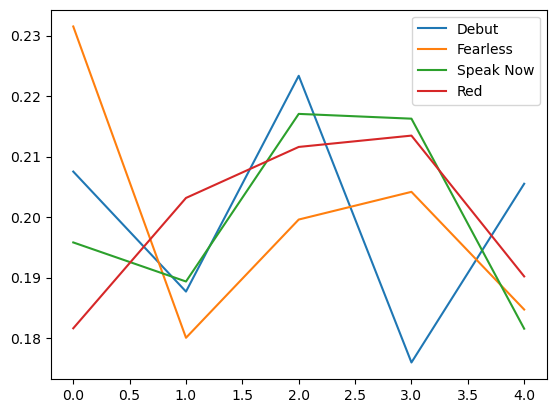

In [40]:
import matplotlib.pyplot as plt
import numpy as np
  
#plotting change in all topic frequencies

# COUNTRY

plt.plot(a['Topic'], a['Debut'], label = "Debut")
plt.plot(a['Topic'], a["You’re Not Sorry (Taylor’s Version)"], label = "Fearless")
plt.plot(a['Topic'], a['The Story of Us'], label = "Speak Now")
plt.plot(a['Topic'], a['We Are Never Ever Getting Back Together'], label = "Red")
plt.legend()
plt.show()

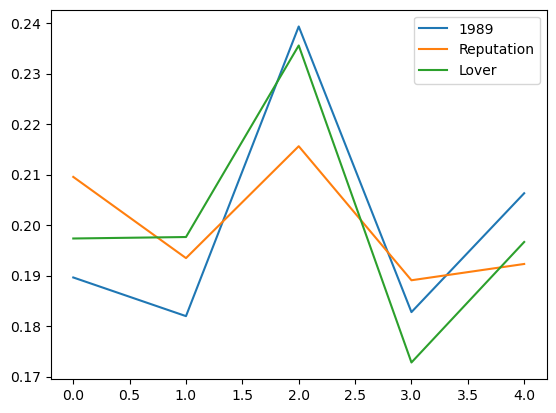

In [41]:
import matplotlib.pyplot as plt
import numpy as np
  
#plotting change in all topic frequencies

#POP

plt.plot(a['Topic'], a['You Are in Love'], label = "1989")
plt.plot(a['Topic'], a['So It Goes...'], label = "Reputation")
plt.plot(a['Topic'], a['You Need To Calm Down'], label = "Lover")
plt.legend()
plt.show()

In [42]:
a

Topic     Debut  You’re Not Sorry (Taylor’s Version)  The Story of Us  \
0      0  0.207516                             0.231509         0.195801   
1      1  0.187675                             0.180034         0.189340   
2      2  0.223355                             0.199586         0.217056   
3      3  0.175951                             0.204166         0.216264   
4      4  0.205502                             0.184705         0.181539   

   We Are Never Ever Getting Back Together  You Are in Love  So It Goes...  \
0                                 0.181604         0.189627       0.209544   
1                                 0.203158         0.181968       0.193463   
2                                 0.211591         0.239335       0.215621   
3                                 0.213465         0.182765       0.189074   
4                                 0.190183         0.206305       0.192298   

   You Need To Calm Down  folklore  evermore  
0               0.197346  0.180883  0.182780  
1               0.197636  0.244486  0.227497  
2               0.235572  0.181069  0.193590  
3               0.172790  0.198451  0.190265  
4               0.196655  0.195111  0.205868

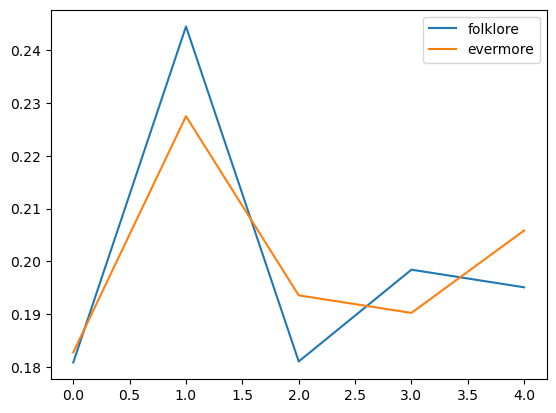

In [43]:
import matplotlib.pyplot as plt
import numpy as np
  
#plotting change in all topic frequencies

#ALTERNATIVE 
ever_y = a.iloc[:,-1:]
plt.plot(a['Topic'], a["folklore"], label = "folklore")
plt.plot(a['Topic'], ever_y, label = "evermore")
plt.legend()
plt.show()

In [44]:
a

Topic     Debut  You’re Not Sorry (Taylor’s Version)  The Story of Us  \
0      0  0.207516                             0.231509         0.195801   
1      1  0.187675                             0.180034         0.189340   
2      2  0.223355                             0.199586         0.217056   
3      3  0.175951                             0.204166         0.216264   
4      4  0.205502                             0.184705         0.181539   

   We Are Never Ever Getting Back Together  You Are in Love  So It Goes...  \
0                                 0.181604         0.189627       0.209544   
1                                 0.203158         0.181968       0.193463   
2                                 0.211591         0.239335       0.215621   
3                                 0.213465         0.182765       0.189074   
4                                 0.190183         0.206305       0.192298   

   You Need To Calm Down  folklore  evermore  
0               0.197346  0.180883  0.182780  
1               0.197636  0.244486  0.227497  
2               0.235572  0.181069  0.193590  
3               0.172790  0.198451  0.190265  
4               0.196655  0.195111  0.205868

In [45]:
def topic_trend(i):
    b = list(a.iloc[i])
    b = b[1:]
    return b

In [47]:
top0 = topic_trend(0)
top1 = topic_trend(1)
top2 = topic_trend(2)
top3 = topic_trend(3)
top4 = topic_trend(4)

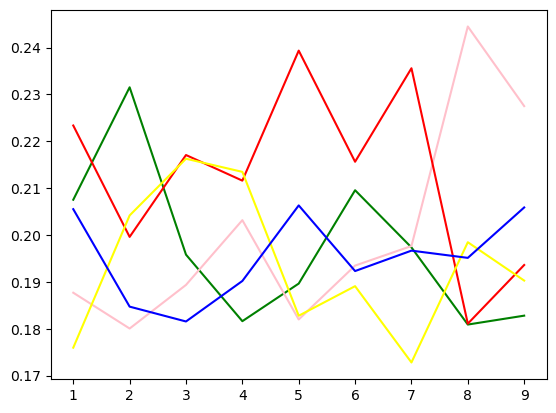

In [53]:
plt.plot(range(1,10), top0, color = 'green')
plt.plot(range(1,10), top1, color = 'pink')
plt.plot(range(1,10), top2, color = 'red')
plt.plot(range(1,10), top3, color = 'yellow')
plt.plot(range(1,10), top4, color = 'blue')